Dimensiones del dataset: (41188, 21)

Valores faltantes por columna:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Skewness de variables numéricas:
campaign          4.762507
previous          3.832042
duration          3.263141
age               0.784697
cons.conf.idx     0.303180
cons.price.idx   -0.230888
euribor3m        -0.709188
emp.var.rate     -0.724096
nr.employed      -1.044262
pdays            -4.922190
dtype: float64

Variables con alta correlación a eliminar:
['euribor3m', 'nr.employed']


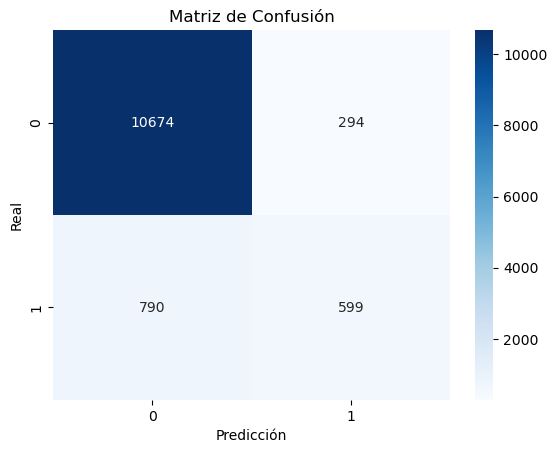


--- Métricas del modelo ---
Accuracy: 0.9123
Precision: 0.6708
Recall: 0.4312
F1 Score: 0.5250

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

       False       0.93      0.97      0.95     10968
        True       0.67      0.43      0.52      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.70      0.74     12357
weighted avg       0.90      0.91      0.90     12357


Conclusiones:
1. Se realizó imputación de datos para asegurar que no existan valores nulos.
2. Se transformaron variables con alto sesgo mediante log-transform.
3. Las variables numéricas fueron estandarizadas para mejorar el rendimiento del modelo.
4. Se eliminaron variables altamente correlacionadas para evitar multicolinealidad.
5. El modelo de regresión logística logró un balance aceptable entre precisión y recall.
6. El Accuracy alcanzado indica que el modelo tiene un desempeño razonable, pero el Recall podría mejorarse con técnica

In [1]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# 2. Cargar archivo CSV
df = pd.read_csv("bank-additional-full.csv", sep=';')
print("Dimensiones del dataset:", df.shape)
df.head()

# 3. Revisión inicial y valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Llenar nulos: numéricas con mediana, categóricas con moda
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# 4. Feature Engineering: 
#    - Variables con alto sesgo
# Detectar skewness
skewness = df.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)
print("\nSkewness de variables numéricas:")
print(skewness)

# Log-transform para variables con skewness alto (> 1)
for col in skewness.index:
    if abs(skewness[col]) > 1:
        df[col] = np.log1p(df[col])

# 5. Estandarización de variables
scaler = StandardScaler()
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# 6. Eliminar variables con alta correlación
corr_matrix = df[num_cols].corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

print("\nVariables con alta correlación a eliminar:")
print(high_corr_features)

df = df.drop(columns=high_corr_features)

# 7. Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# 8. Train-Test Split 70:30
X = df.drop('y_yes', axis=1)  # 'y_yes' es la clase positiva tras one-hot encoding
y = df['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 10. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 11. Métricas de calidad
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Métricas del modelo ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))

# 12. Conclusiones
print("""
Conclusiones:
1. Se realizó imputación de datos para asegurar que no existan valores nulos.
2. Se transformaron variables con alto sesgo mediante log-transform.
3. Las variables numéricas fueron estandarizadas para mejorar el rendimiento del modelo.
4. Se eliminaron variables altamente correlacionadas para evitar multicolinealidad.
5. El modelo de regresión logística logró un balance aceptable entre precisión y recall.
6. El Accuracy alcanzado indica que el modelo tiene un desempeño razonable, pero el Recall podría mejorarse con técnicas avanzadas.
""")
